Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [4]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [405]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [406]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[[-0.5 -0.1]]
1.0


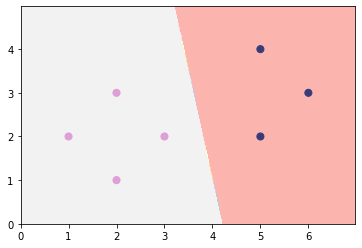

In [407]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha = 0)
clf.fit(seven_X,seven_y)
print(clf.coef_)
print(accuracy_score(seven_y,clf.predict(seven_X)))
mlutils.plot_2d_clf_problem(seven_X,seven_y,clf.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

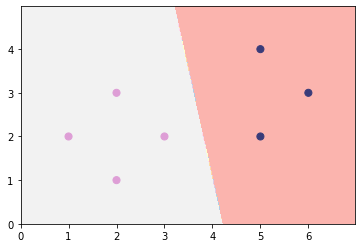

In [408]:
# Vaš kôd ovdje
clf = LinearRegression()
clf.fit(seven_X,seven_y)
mlutils.plot_2d_clf_problem(seven_X,seven_y,lambda x : clf.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [409]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

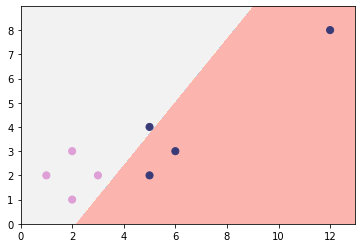

In [410]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha = 0)
clf.fit(outlier_X,outlier_y)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,clf.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [411]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

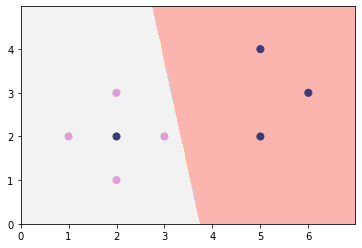

In [412]:
# Vaš kôd ovdje
clf = RidgeClassifier(alpha = 0)
clf.fit(unsep_X,unsep_y)
mlutils.plot_2d_clf_problem(unsep_X,unsep_y,clf.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [413]:
from sklearn.datasets import make_classification

(50, 2)


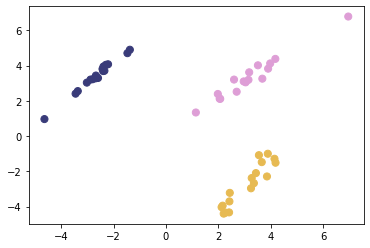

In [414]:
# Vaš kôd ovdje
X,y = make_classification(n_samples = 50,n_features = 2,n_redundant = 0,n_classes = 3,n_clusters_per_class = 1,class_sep = 3)
print(X.shape)
mlutils.plot_2d_clf_problem(X,y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

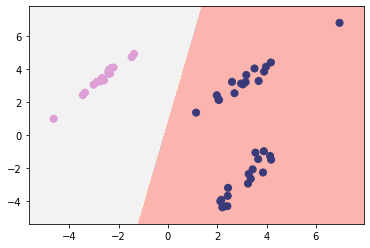

In [415]:
# Vaš kôd ovdje
clf0 = LinearRegression()
y_i = list()
for j in range(len(y)):
    if(y[j] == 0):
        y_i.append(1)
    else:
        y_i.append(0)
clf0.fit(X,y_i)
mlutils.plot_2d_clf_problem(X,y_i,lambda x : clf0.predict(x) >= 0.5)

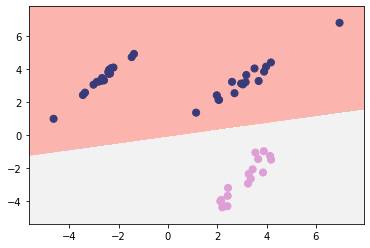

In [416]:
clf1 = LinearRegression()
y_i = list()
for j in range(len(y)):
    if(y[j] == 1):
        y_i.append(1)
    else:
        y_i.append(0)
clf1.fit(X,y_i)
mlutils.plot_2d_clf_problem(X,y_i,lambda x : clf1.predict(x) >= 0.5)

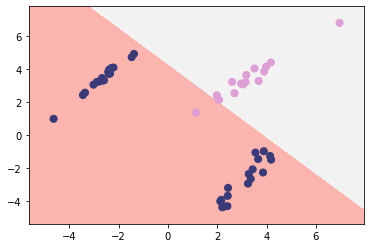

In [417]:
clf2 = LinearRegression()
y_i = list()
for j in range(len(y)):
    if(y[j] == 2):
        y_i.append(1)
    else:
        y_i.append(0)
clf2.fit(X,y_i)
mlutils.plot_2d_clf_problem(X,y_i,lambda x : clf2.predict(x) >= 0.5)

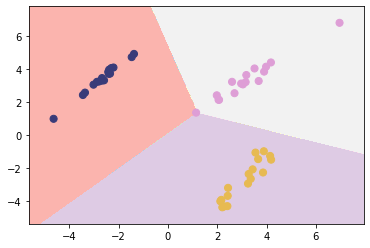

In [418]:
h_max = lambda x: argmax([clf0.predict(x.reshape(1, -1)), clf1.predict(x.reshape(1, -1)), clf2.predict(x.reshape(1, -1))])
mlutils.plot_2d_clf_problem(X,y,h_max)

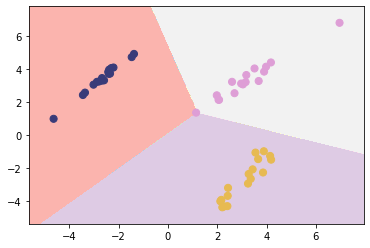

In [419]:
clf = RidgeClassifier(alpha = 0)
clf.fit(X,y)
mlutils.plot_2d_clf_problem(X,y,clf.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

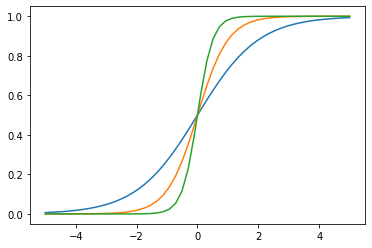

In [420]:
# Vaš kôd ovdje
def sigm(x,alpha = 1):
    return 1/(1+np.exp(-alpha*x))


X = np.linspace(-5,5)
for alpha in [1,2,4]:
    plt.plot(X,sigm(X,alpha))

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [421]:
from numpy import linalg

def sigm(x,alpha = 1):
    return 1/(1+np.exp(-alpha*x))

def lr_h(x, w): 
    # Vaš kôd ovdje
    w0 = w[0]
    w_i = w[1:]
    predicition = matmul(w_i.T,x)+w0
    return sigm(predicition)
    

def cross_entropy_error(X, y, w): 
    # Vaš kôd ovdje
    suma = 0
    for i in range(len(X)):
        suma = suma + (-y[i]*log(lr_h(X[i],w)) - (1 - y[i])*log(1 - lr_h(X[i],w)))
    
    return (1/len(X))*suma

def lr_train(X, y, eta=0.01, max_iter=2000, trace=False, alpha=0, epsilon=0.0001):
    #Vaš kôd ovdje
    if(X.any() == None or len(X) == 0):
        return
    
    k=0
    w = np.zeros(len(X[0]))
    w0 = 0
    traced = list()
    while(k < max_iter):
        dw = np.zeros(len(X[0]))
        dw0 = 0
        w_curr = np.hstack([w0,w])
        curr_error = cross_entropy_error(X,y,w_curr)
        
        for i in range(len(X)):
            h = lr_h(X[i],w_curr)
            dw0 = dw0 - (h-y[i])
            dw = dw - (h-y[i])*X[i]
            
        w0 = w0 + eta*dw0
        w = w*(1-eta*alpha) + eta*dw
        k += 1
        
        w_curr = np.hstack([w0,w])
        new_error = cross_entropy_error(X,y,w_curr)
        if(trace):
            traced.append(w_curr)
            #print(w_curr)
            #print("Current error: "+str(new_error))
        
        if(abs(curr_error - new_error) < epsilon):
            print("Error minimizied!")
            print("Number of iterations: "+str(k))
            
            if(trace):
                return traced
            return w_curr
        
    print("Max iterations!")
    w = np.hstack([w0,w])
    if(trace):
        return traced
    return w

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Error minimizied!
Number of iterations: 947
[ 4.45449454 -1.71089242  0.68413507]
0.13521872720206748


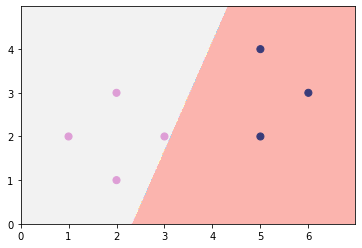

In [422]:
# Vaš kôd ovdje
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures


w = lr_train(seven_X,seven_y)
print(w)
print(cross_entropy_error(seven_X,seven_y,w))

def predict(x):
    x = np.hstack([1,x])
    return matmul(x,w) >= 0.5

mlutils.plot_2d_clf_problem(seven_X,seven_y,predict)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

Error minimizied!
Number of iterations: 1142
Error minimizied!
Number of iterations: 947


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Error minimizied!
Number of iterations: 511
Error minimizied!
Number of iterations: 378
Error minimizied!
Number of iterations: 947


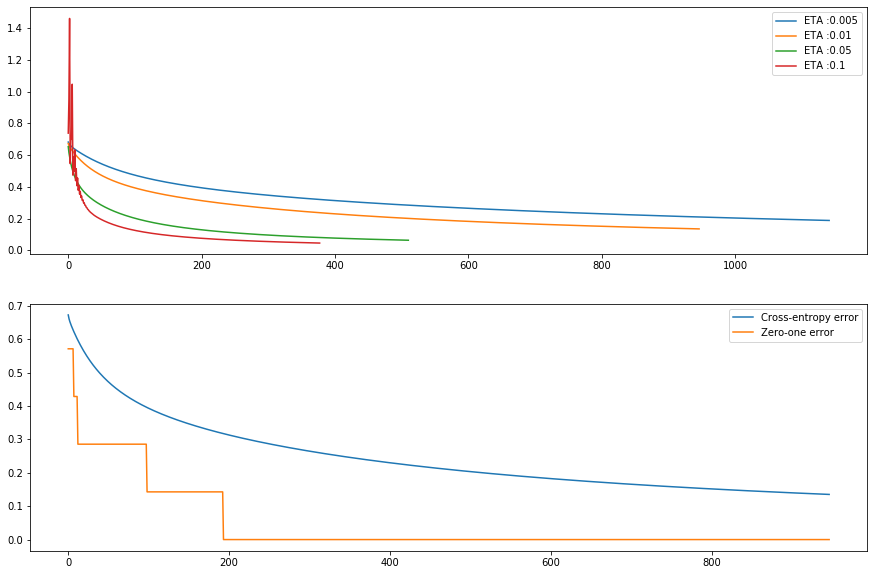

In [423]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures
plt.figure(figsize=(15,10))

def zero_one_error(X,y,w):
    poly = PolynomialFeatures(1)
    X_poly = poly.fit_transform(X)
    h = sigm(matmul(X_poly,w))
    error = 0
    for i in range(len(h)):
        h[i] = round(h[i])
        if(h[i] != y[i]):
            error += 1
    return error*(1/len(h))
    
for eta in [0.005,0.01,0.05,0.1]:
    traced = lr_train(seven_X,seven_y,eta = eta,max_iter = 2000,trace = True)
    eta_errors = list()
    for i in range(len(traced)):
        eta_errors.append(cross_entropy_error(seven_X,seven_y,traced[i]))
    plt.subplot(2,1,1)
    plt.plot(eta_errors,label = "ETA :"+str(eta))
plt.legend()


traced = lr_train(seven_X,seven_y,trace = True)
cross_entropy = list()
zero_one = list()
for i in range(len(traced)):
    cross_entropy.append(cross_entropy_error(seven_X,seven_y,traced[i]))
    zero_one.append(zero_one_error(seven_X,seven_y,traced[i]))

plt.subplot(2,1,2)
plt.plot(cross_entropy,label = "Cross-entropy error")
plt.plot(zero_one,label = "Zero-one error")
plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [424]:
from sklearn.linear_model import LogisticRegression

[4.05888534] [[-1.63833005  0.72416106]]


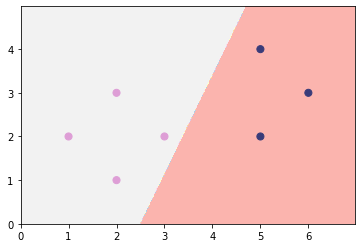

In [425]:
# Vaš kôd ovdje
model = LogisticRegression(penalty = "none",solver="sag",max_iter = 2000,tol = 10e-4)
model.fit(seven_X,seven_y)

print(model.intercept_,model.coef_)
mlutils.plot_2d_clf_problem(seven_X,seven_y,model.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

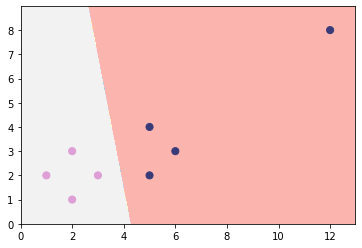

In [426]:
# Vaš kôd ovdje
model = LogisticRegression(solver = "saga",max_iter = 2000)
model.fit(outlier_X,outlier_y)

mlutils.plot_2d_clf_problem(outlier_X,outlier_y,model.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


Error minimizied!
Number of iterations: 947


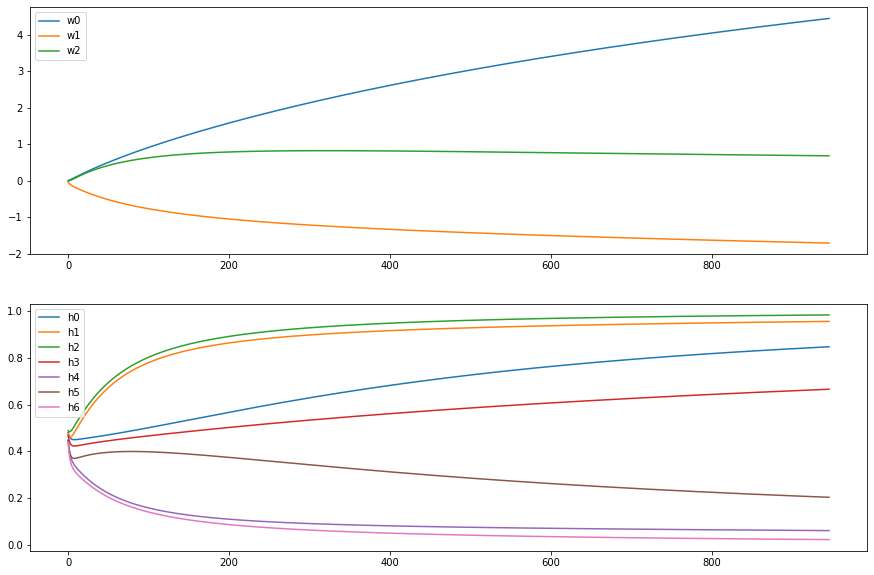

In [433]:
# Vaš kôd ovdje
plt.figure(figsize=(15,10))

def hx(X,w):
    poly = PolynomialFeatures(1)
    X_poly = poly.fit_transform(X)
    return sigm(matmul(X_poly,w))

ws = lr_train(seven_X,seven_y,trace = True)
w0s = list()
w1s = list()
w2s = list()
for w in ws:
    w0s.append(w[0])
    w1s.append(w[1])
    w2s.append(w[2])

plt.subplot(2,1,1)
plt.plot(w0s,label = "w0")
plt.plot(w1s,label = "w1")
plt.plot(w2s,label = "w2")
plt.legend()

hs = [[],[],[],[],[],[],[]]
for w in ws:
    h = hx(seven_X,w)
    for i in range(len(h)):
        hs[i].append(h[i])

plt.subplot(2,1,2)
for i in range(len(hs)):
    plt.plot(hs[i],label = "h"+str(i))
plt.legend()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

Error minimizied!
Number of iterations: 454


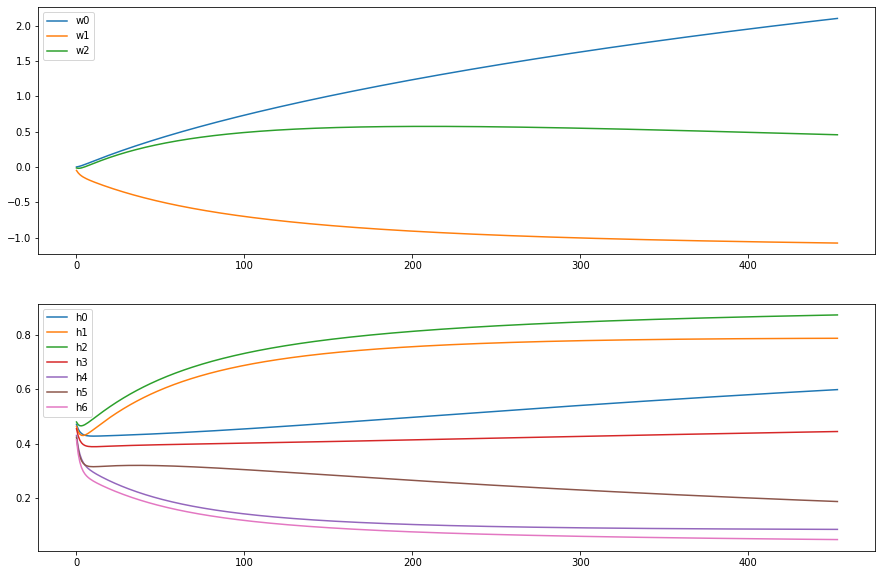

In [434]:
# Vaš kôd ovdje
plt.figure(figsize=(15,10))

def hx(X,w):
    poly = PolynomialFeatures(1)
    X_poly = poly.fit_transform(X)
    return sigm(matmul(X_poly,w))

ws = lr_train(unsep_X,unsep_y,trace = True)
w0s = list()
w1s = list()
w2s = list()
for w in ws:
    w0s.append(w[0])
    w1s.append(w[1])
    w2s.append(w[2])

plt.subplot(2,1,1)
plt.plot(w0s,label = "w0")
plt.plot(w1s,label = "w1")
plt.plot(w2s,label = "w2")
plt.legend()

hs = [[],[],[],[],[],[],[]]
for w in ws:
    h = hx(seven_X,w)
    for i in range(len(h)):
        hs[i].append(h[i])

plt.subplot(2,1,2)
for i in range(len(hs)):
    plt.plot(hs[i],label = "h"+str(i))
plt.legend()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [435]:
from numpy.linalg import norm

Error minimizied!
Number of iterations: 947
Error minimizied!
Number of iterations: 804
Error minimizied!

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app



Number of iterations: 405
Error minimizied!
Number of iterations: 4


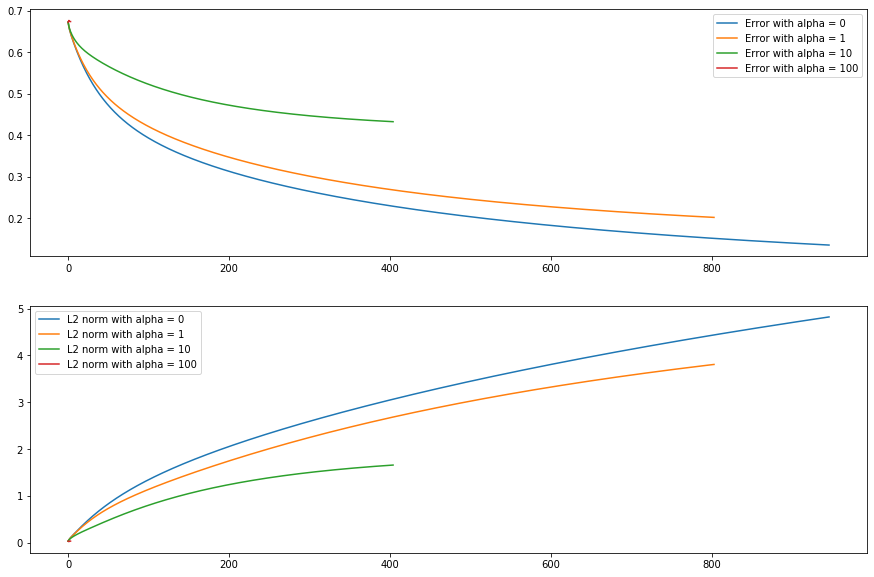

In [436]:
# Vaš kôd ovdje
plt.figure(figsize=(15,10))

for alpha in [0,1,10,100]:
    ws = lr_train(seven_X,seven_y,alpha = alpha,trace = True)
    cross_error = list()
    l2_norm = list()
    for w in ws:
        cross_error.append(cross_entropy_error(seven_X,seven_y,w))
        l2_norm.append(norm(w,ord = 2))
    plt.subplot(2,1,1)
    plt.plot(cross_error,label = "Error with alpha = "+str(alpha))
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(l2_norm,label = "L2 norm with alpha = "+str(alpha))
    plt.legend()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [437]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

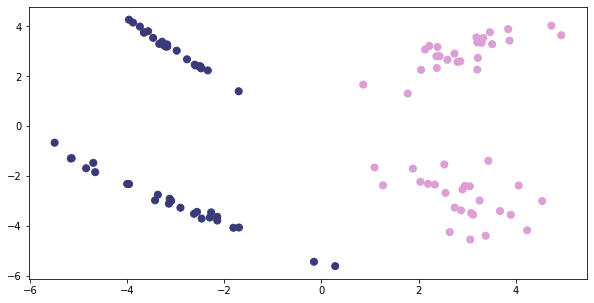

In [438]:
# Vaš kôd ovdje
plt.figure(figsize = [10,5])  
X,y = make_classification(n_samples = 100,n_features = 2,n_redundant = 0,n_classes = 2,n_clusters_per_class = 2,class_sep=3)
mlutils.plot_2d_clf_problem(X,y)        

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?

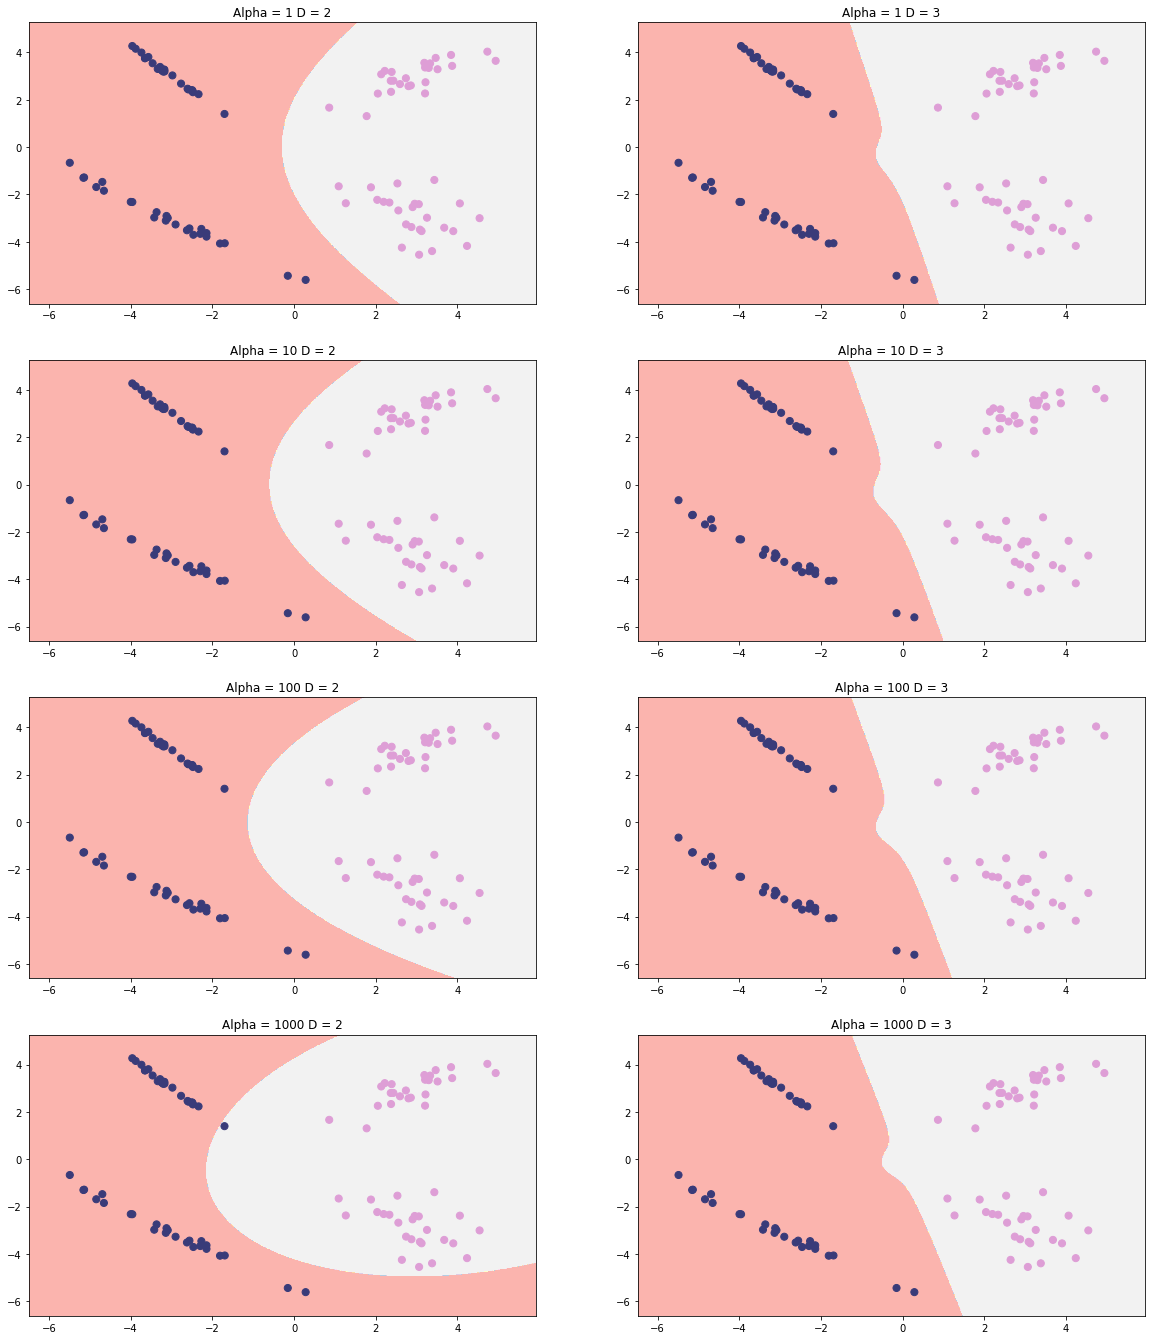

In [439]:
plt.figure(figsize = [20,30])
k = 0
for alpha in [1,10,100,1000]:
    model = LogisticRegression(solver = "sag", max_iter = 2000,C = 1/alpha)
    for d in [2,3]:
        poly = PolynomialFeatures(d)
        X_poly = poly.fit_transform(X)
        model.fit(X_poly,y)
        k += 1
        
        plt.subplot(5,2,k)
        mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))) 
        plt.title("Alpha = "+str(alpha)+ " D = "+str(d))
        
        